# **Problem Statement:**

● The model should achieve a high level of accuracy in classifying iris species.

● The model's predictions should be consistent and reliable, as measured by
cross-validation.

● The final report should provide clear and comprehensive documentation of the project, including all code, visualizations, and findings.

By achieving these objectives, the project will demonstrate the ability to apply machine
learning techniques to a classic classification problem, providing insights into the
characteristics of different iris species and the effectiveness of various algorithms for
this task.

# **Dataset Preparation**

● Dataset:

The Iris dataset is available in the UCI Machine Learning Repository.


● Features:

Sepal length, sepal width, petal length, petal width.

● Labels:

Iris species (Setosa, Versicolour, Virginica).

In [ ]:
# Import Required Libraries
import pandas as pd
import numpy as np

In [ ]:
df = pd.read_csv('Iris.csv')

In [ ]:
df.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [ ]:
df['Species'].unique()

array(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'], dtype=object)

In [ ]:
df['encoded_species'] = df['Species'].map({'Iris-setosa': 0, 'Iris-versicolor': 1, 'Iris-virginica': 2})

In [ ]:
df.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species,encoded_species
0,5.1,3.5,1.4,0.2,Iris-setosa,0
1,4.9,3.0,1.4,0.2,Iris-setosa,0
2,4.7,3.2,1.3,0.2,Iris-setosa,0
3,4.6,3.1,1.5,0.2,Iris-setosa,0
4,5.0,3.6,1.4,0.2,Iris-setosa,0


# **Data Exploration and Visualization**

● Load the dataset and explore it using descriptive statistics and visualization
techniques.

● Use libraries like Pandas for data manipulation and Matplotlib/Seaborn for
visualization.

● Example visualizations include scatter plots, pair plots, and histograms to
understand the distribution and relationships between features.

In [ ]:
# Import Required Libraries
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   SepalLengthCm    150 non-null    float64
 1   SepalWidthCm     150 non-null    float64
 2   PetalLengthCm    150 non-null    float64
 3   PetalWidthCm     150 non-null    float64
 4   Species          150 non-null    object 
 5   encoded_species  150 non-null    int64  
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


In [ ]:
df.describe()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,encoded_species
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667,1.000000
std,0.828066,0.433594,1.764420,0.763161,0.819232
min,4.300000,2.000000,1.000000,0.100000,0.000000
25%,5.100000,2.800000,1.600000,0.300000,0.000000
50%,5.800000,3.000000,4.350000,1.300000,1.000000
75%,6.400000,3.300000,5.100000,1.800000,2.000000
max,7.900000,4.400000,6.900000,2.500000,2.000000


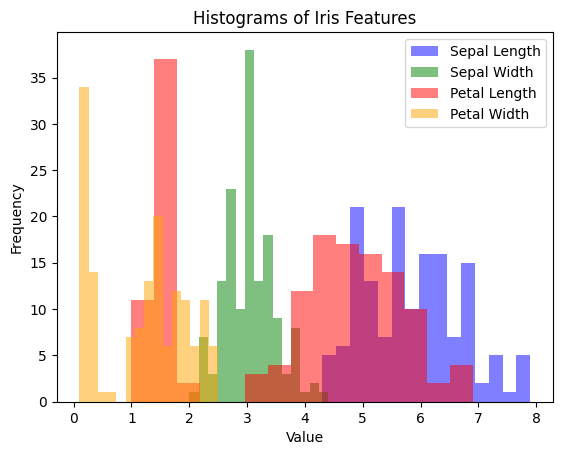

In [ ]:
# Histogram
plt.hist(df['SepalLengthCm'], bins=15, alpha=0.5, label="Sepal Length", color="blue")
plt.hist(df['SepalWidthCm'], bins=15, alpha=0.5, label="Sepal Width", color="green")
plt.hist(df['PetalLengthCm'], bins=15, alpha=0.5, label="Petal Length", color="red")
plt.hist(df['PetalWidthCm'], bins=15, alpha=0.5, label="Petal Width", color="orange")

plt.title("Histograms of Iris Features")
plt.xlabel("Value")
plt.ylabel("Frequency")
plt.legend()
plt.show()

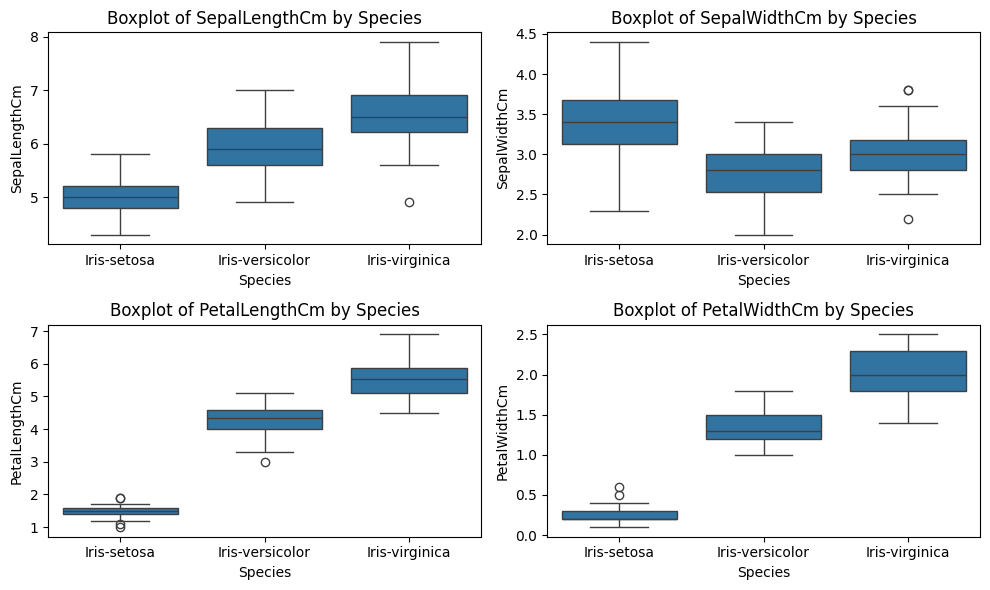

In [ ]:
features = ['SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm']
fig, axes = plt.subplots(2, 2, figsize=(10, 6))

for ax, feature in zip(axes.flatten(), features):
    sns.boxplot(x="Species", y=feature, data=df, ax=ax)
    ax.set_title(f"Boxplot of {feature} by Species")

plt.tight_layout()
plt.show()

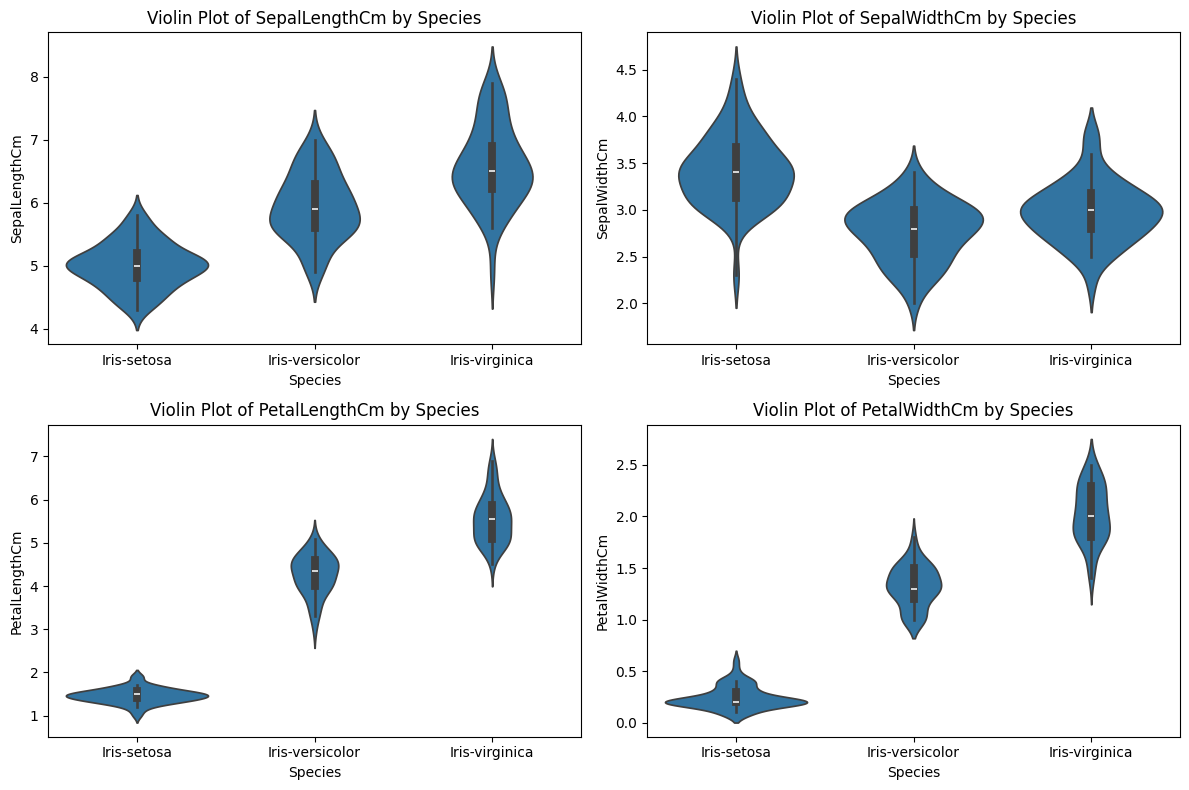

In [ ]:
features = ['SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm']

# Create subplots (2x2 grid for 4 violin plots)
fig, axes = plt.subplots(2, 2, figsize=(12, 8))

for ax, feature in zip(axes.flatten(), features):
    sns.violinplot(x="Species", y=feature, data=df, ax=ax, inner="box")
    ax.set_title(f"Violin Plot of {feature} by Species")

plt.tight_layout()
plt.show()

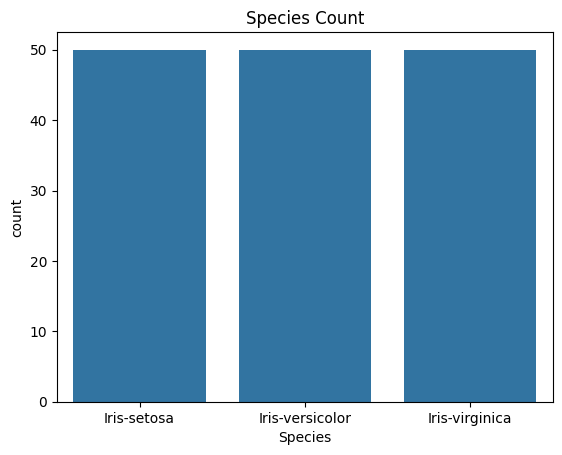

In [ ]:
# Countplot (Categorical Counts)
sns.countplot(x="Species", data=df)
plt.title("Species Count")
plt.show()

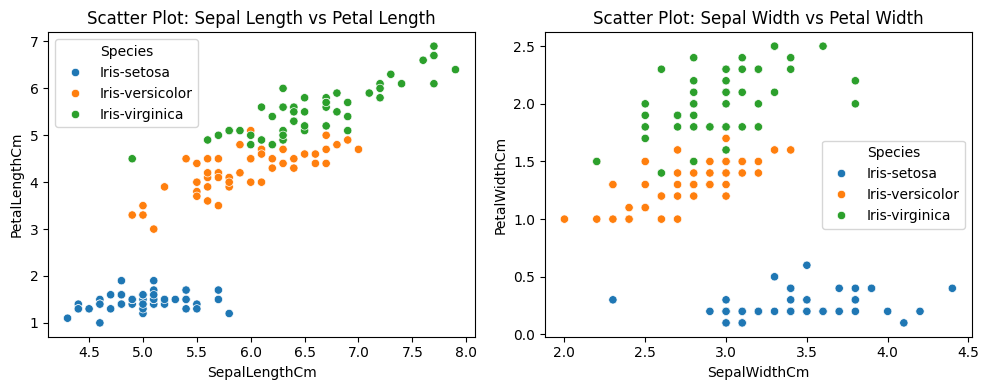

In [ ]:
# Scatter Plot

fig, axes = plt.subplots(1, 2, figsize=(10, 4))

sns.scatterplot(x="SepalLengthCm", y="PetalLengthCm", hue="Species", data=df, ax=axes[0])
axes[0].set_title("Scatter Plot: Sepal Length vs Petal Length")

sns.scatterplot(x="SepalWidthCm", y="PetalWidthCm", hue="Species", data=df, ax=axes[1])
axes[1].set_title("Scatter Plot: Sepal Width vs Petal Width")

plt.tight_layout()
plt.show()


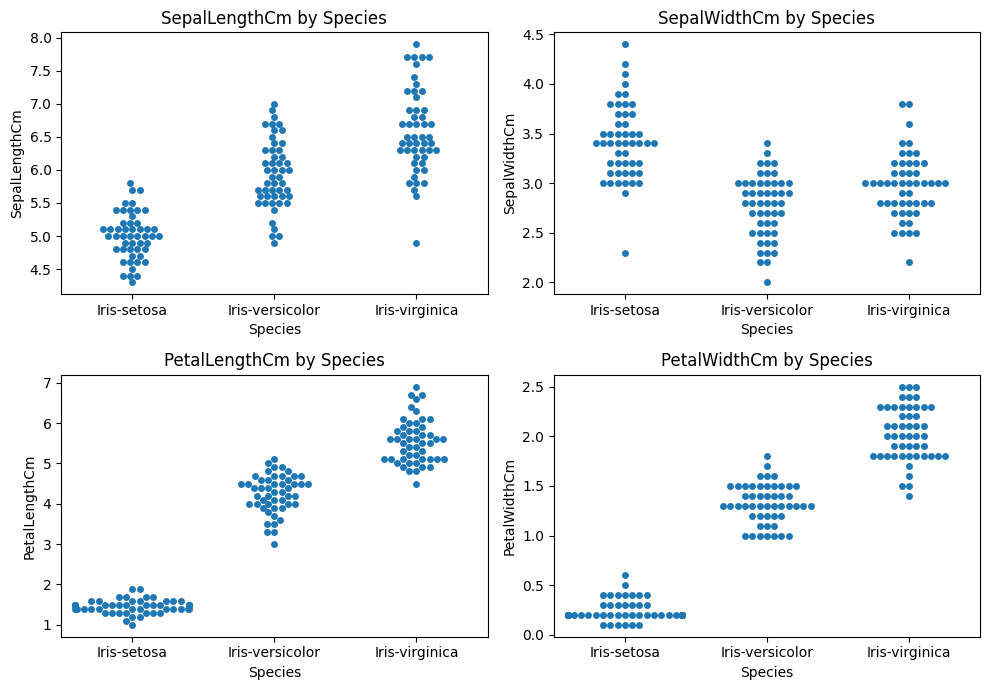

In [ ]:
# Swarm Plot
features = ['SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm']
fig, axes = plt.subplots(2, 2, figsize=(10, 7))

for ax, feature in zip(axes.flatten(), features):
    sns.swarmplot(x="Species", y=feature, data=df, ax=ax)
    ax.set_title(f"{feature} by Species")

plt.tight_layout()
plt.show()

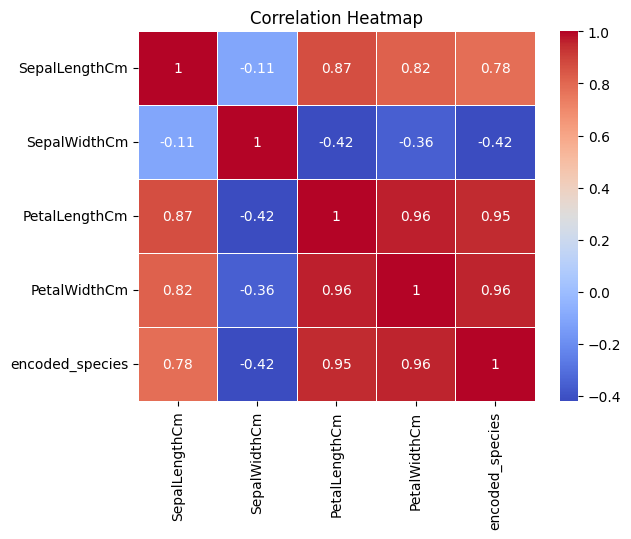

In [ ]:
# Heatmap (Correlation Matrix)
sns.heatmap(df.drop("Species", axis=1).corr(), annot=True, cmap="coolwarm", linewidths=0.5)
plt.title("Correlation Heatmap")
plt.show()

# **Data Preprocessing**

● Handle missing values (if any).

● Standardize or normalize the features if necessary to ensure they are on a
similar scale.

● Split the dataset into training and testing sets (commonly 80% training and
20% testing).

In [ ]:
# Import Required Libraries
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [ ]:
# Handle missing values
print("Missing values before handling:\n\n", df.isnull().sum())

Missing values before handling:

 SepalLengthCm      0
SepalWidthCm       0
PetalLengthCm      0
PetalWidthCm       0
Species            0
encoded_species    0
dtype: int64


In [ ]:
# Features & target
X = df[['SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm']]
y = df['encoded_species']

In [ ]:
# Standardization
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [ ]:
# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42, stratify=y)

# **Model Selection and Training**

● Choose a classification algorithm. Common choices for this problem
include:

1)  Support Vector Machine (SVM)

2)  Logistic Regression

3.  K-Means

4.  PCA

Train the model using the training data.


In [ ]:
# Import Required Libraries
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.metrics import accuracy_score, classification_report

## Support Vector Machine

In [ ]:
# Support Vector Machine (SVM)

svm = SVC(kernel='linear')
svm.fit(X_train, y_train)
y_pred_svm = svm.predict(X_test)
print("\n🔹 SVM Accuracy:", accuracy_score(y_test, y_pred_svm))



🔹 SVM Accuracy: 1.0


## Logistic Regression

In [ ]:
# Logistic Regression
log_reg = LogisticRegression(max_iter=200)
log_reg.fit(X_train, y_train)
y_pred_lr = log_reg.predict(X_test)
print("\n🔹 Logistic Regression Accuracy:", accuracy_score(y_test, y_pred_lr))



🔹 Logistic Regression Accuracy: 0.9333333333333333


## K-Means Clustering

In [ ]:
# K-Means Clustering (unsupervised)
kmeans = KMeans(n_clusters=3, random_state=42, n_init=10)
kmeans.fit(X_scaled)
print("\n🔹 K-Means Cluster Centers:\n", kmeans.cluster_centers_)



🔹 K-Means Cluster Centers:
 [[-0.05021989 -0.88029181  0.34753171  0.28206327]
 [-1.01457897  0.84230679 -1.30487835 -1.25512862]
 [ 1.13597027  0.09659843  0.996271    1.01717187]]


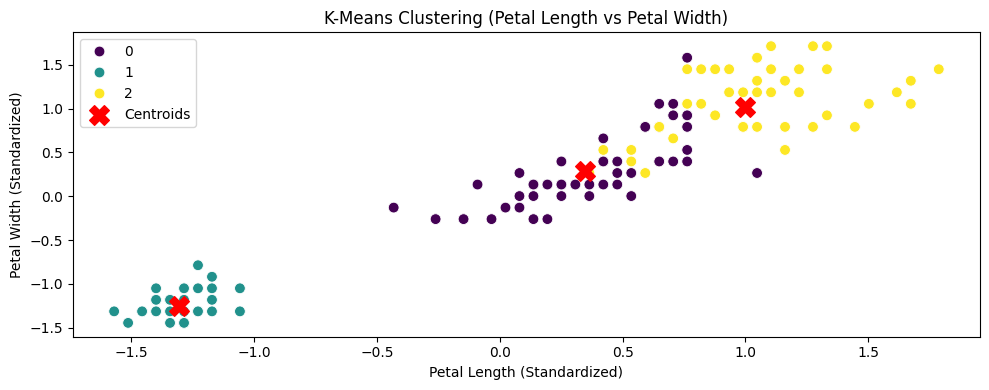

In [ ]:
# Visualize K-Means on Iris

# Run KMeans again (3 clusters for 3 species)
kmeans = KMeans(n_clusters=3, random_state=42, n_init=10)
y_kmeans = kmeans.fit_predict(X_scaled)

# Add cluster labels to DataFrame
df["KMeans_Cluster"] = y_kmeans

# Scatter plot (PetalLength vs PetalWidth)
plt.figure(figsize=(10,4))

# K-Means Clusters
sns.scatterplot(x=X_scaled[:,2], y=X_scaled[:,3], hue=y_kmeans, palette="viridis", s=60)
plt.scatter(kmeans.cluster_centers_[:,2], kmeans.cluster_centers_[:,3],
            s=200, c="red", marker="X", label="Centroids")
plt.title("K-Means Clustering (Petal Length vs Petal Width)")
plt.xlabel("Petal Length (Standardized)")
plt.ylabel("Petal Width (Standardized)")
plt.legend()

plt.tight_layout()
plt.show()


## PCA

In [ ]:
# PCA (Dimensionality Reduction)
pca = PCA(n_components=2)   # reduce to 2D for visualization
X_pca = pca.fit_transform(X_scaled)

df_pca = pd.DataFrame(X_pca, columns=["PC1", "PC2"])
df_pca["Species"] = df["Species"]

print("\n🔹 PCA Explained Variance Ratio:\n", pca.explained_variance_ratio_, "\n\n")


🔹 PCA Explained Variance Ratio:
 [0.72770452 0.23030523] 




# **Model Evaluation**

● Evaluate the model using the testing data.

● Use metrics like accuracy, precision, recall, and F1-score to assess the
model's performance.

● Visualize the confusion matrix to understand the classification results in
detail.

In [ ]:
# Import Required Libraries
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, ConfusionMatrixDisplay
from sklearn.metrics import adjusted_rand_score, silhouette_score


## SVM Evaluation


📌 SVM Evaluation Metrics
Accuracy: 1.0
Precision (macro): 1.0
Recall (macro): 1.0
F1-score (macro): 1.0


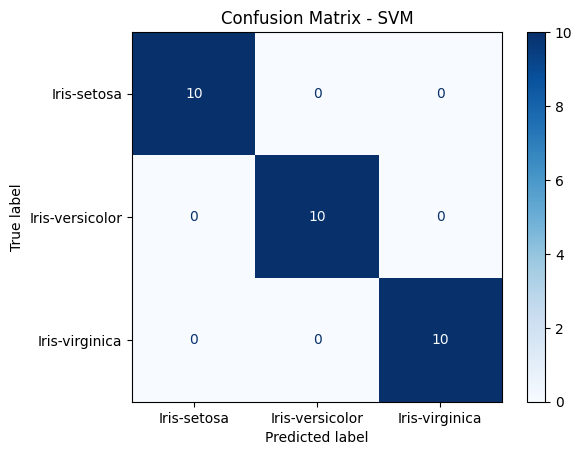

In [ ]:
# Evaluate SVM

print("\n📌 SVM Evaluation Metrics")
print("Accuracy:", accuracy_score(y_test, y_pred_svm))
print("Precision (macro):", precision_score(y_test, y_pred_svm, average="macro"))
print("Recall (macro):", recall_score(y_test, y_pred_svm, average="macro"))
print("F1-score (macro):", f1_score(y_test, y_pred_svm, average="macro"))

cm_svm = confusion_matrix(y_test, y_pred_svm)
disp_svm = ConfusionMatrixDisplay(confusion_matrix=cm_svm, display_labels=df["Species"].unique())
disp_svm.plot(cmap="Blues")
plt.title("Confusion Matrix - SVM")
plt.show()

## Logistic Regression Evaluation


📌 Logistic Regression Evaluation Metrics
Accuracy: 0.9333333333333333
Precision (macro): 0.9333333333333332
Recall (macro): 0.9333333333333332
F1-score (macro): 0.9333333333333332


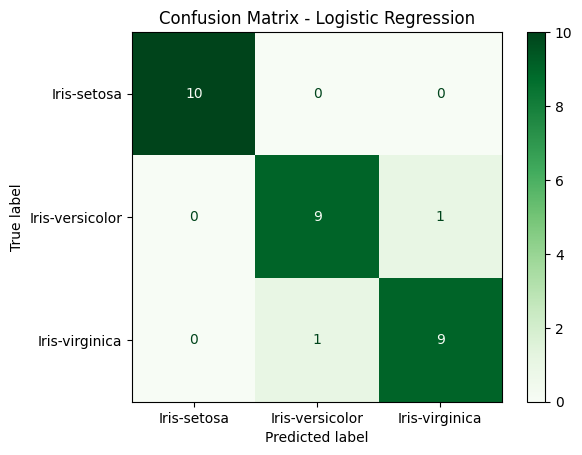

In [ ]:
# Evaluate Logistic Regression
print("\n📌 Logistic Regression Evaluation Metrics")
print("Accuracy:", accuracy_score(y_test, y_pred_lr))
print("Precision (macro):", precision_score(y_test, y_pred_lr, average="macro"))
print("Recall (macro):", recall_score(y_test, y_pred_lr, average="macro"))
print("F1-score (macro):", f1_score(y_test, y_pred_lr, average="macro"))

cm_lr = confusion_matrix(y_test, y_pred_lr)
disp_lr = ConfusionMatrixDisplay(confusion_matrix=cm_lr, display_labels=df["Species"].unique())
disp_lr.plot(cmap="Greens")
plt.title("Confusion Matrix - Logistic Regression")
plt.show()

## KMeans Evaluation

In [ ]:
# True labels
y_true = df["encoded_species"]

# KMeans predictions
y_kmeans = kmeans.fit_predict(X_scaled)

print("\n📌 KMeans Evaluation")
print("Adjusted Rand Index:", adjusted_rand_score(y_true, y_kmeans))
print("Silhouette Score:", silhouette_score(X_scaled, y_kmeans))



📌 KMeans Evaluation
Adjusted Rand Index: 0.6201351808870379
Silhouette Score: 0.4589717867018717


## PCA Evaluation


📌 PCA Evaluation
Explained Variance Ratio: [0.72770452 0.23030523]
Total Variance Explained (first 2 PCs): 0.9580097536148199


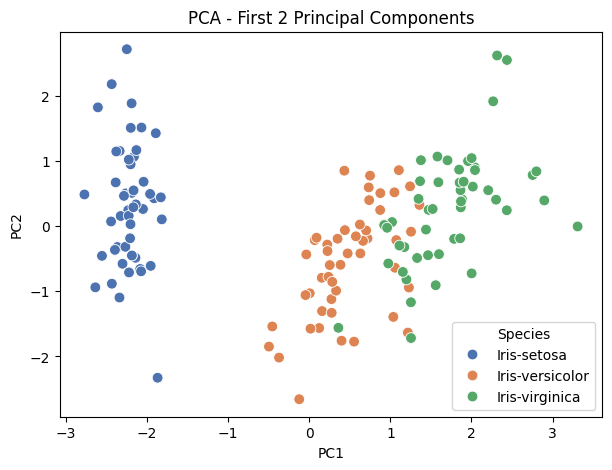

In [ ]:
# PCA Evaluation
explained_variance = pca.explained_variance_ratio_
print("\n📌 PCA Evaluation")
print("Explained Variance Ratio:", explained_variance)
print("Total Variance Explained (first 2 PCs):", explained_variance[:2].sum())


plt.figure(figsize=(7,5))
sns.scatterplot(x=X_pca[:,0], y=X_pca[:,1], hue=df["Species"], palette="deep", s=60)
plt.title("PCA - First 2 Principal Components")
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.show()


## Model Comparison on Iris Dataset

In [ ]:
import pandas as pd
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import adjusted_rand_score, silhouette_score

results = {}

# -------------------------
# SVM Evaluation
# -------------------------
results["SVM"] = {
    "Accuracy": accuracy_score(y_test, y_pred_svm),
    "Precision": precision_score(y_test, y_pred_svm, average="macro"),
    "Recall": recall_score(y_test, y_pred_svm, average="macro"),
    "F1-score": f1_score(y_test, y_pred_svm, average="macro"),
    "Notes": "Supervised classifier"
}

# -------------------------
# Logistic Regression Evaluation
# -------------------------
results["Logistic Regression"] = {
    "Accuracy": accuracy_score(y_test, y_pred_lr),
    "Precision": precision_score(y_test, y_pred_lr, average="macro"),
    "Recall": recall_score(y_test, y_pred_lr, average="macro"),
    "F1-score": f1_score(y_test, y_pred_lr, average="macro"),
    "Notes": "Supervised classifier"
}

# -------------------------
# KMeans Evaluation
# -------------------------
y_kmeans = kmeans.fit_predict(X_scaled)
results["KMeans"] = {
    "Adjusted Rand Index": adjusted_rand_score(df["encoded_species"], y_kmeans),
    "Silhouette Score": silhouette_score(X_scaled, y_kmeans),
    "Notes": "Unsupervised clustering"
}

# -------------------------
# PCA Evaluation
# -------------------------
explained_variance = pca.explained_variance_ratio_
results["PCA"] = {
    "Explained Variance (PC1)": explained_variance[0],
    "Explained Variance (PC2)": explained_variance[1],
    "Total (PC1+PC2)": explained_variance[:2].sum(),
    "Notes": "Dimensionality reduction"
}

# Convert results to DataFrame for nice display
results_df = pd.DataFrame(results).T
print("\n📊 Model Comparison on Iris Dataset")
results_df


📊 Model Comparison on Iris Dataset


,Accuracy,Precision,Recall,F1-score,Notes,Adjusted Rand Index,Silhouette Score,Explained Variance (PC1),Explained Variance (PC2),Total (PC1+PC2)
SVM,1.0,1.0,1.0,1.0,Supervised classifier,NaN,NaN,NaN,NaN,NaN
Logistic Regression,0.933333,0.933333,0.933333,0.933333,Supervised classifier,NaN,NaN,NaN,NaN,NaN
KMeans,NaN,NaN,NaN,NaN,Unsupervised clustering,0.620135,0.458972,NaN,NaN,NaN
PCA,NaN,NaN,NaN,NaN,Dimensionality reduction,NaN,NaN,0.727705,0.230305,0.95801


# **Hyperparameter Tuning**

● Use techniques like Grid Search or Random Search to find the optimal
hyperparameters for the chosen model.

● Cross-validation can also be employed to ensure the model generalizes
well to unseen data.

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC

# Define the parameter grid for SVM
param_grid = {
    "C": [0.1, 1, 10, 100],       # Regularization parameter
    "kernel": ["linear", "rbf", "poly"],  # Types of kernels
    "gamma": ["scale", "auto"]    # Kernel coefficient
}

# Initialize SVM
svm = SVC()

# Grid Search with 5-fold cross-validation
grid_search = GridSearchCV(estimator=svm, param_grid=param_grid,
                           cv=5, scoring="accuracy", n_jobs=-1)

grid_search.fit(X_train, y_train)

print("✅ Best Parameters:", grid_search.best_params_)
print("✅ Best Cross-Validation Accuracy:", grid_search.best_score_)

# Evaluate on test data
best_svm = grid_search.best_estimator_
y_pred_best = best_svm.predict(X_test)

print("Test Accuracy with Best SVM:", accuracy_score(y_test, y_pred_best))


✅ Best Parameters: {'C': 0.1, 'gamma': 'scale', 'kernel': 'linear'}
✅ Best Cross-Validation Accuracy: 0.975
Test Accuracy with Best SVM: 0.9333333333333333


# **Model Interpretation and Insights**

● Interpret the model results and understand which features are most
important for the classification.

● Visualize decision boundaries if using models like Decision Trees or SVM.

## Interpret Model Results (Feature Importance)

In [ ]:
# Select features & target
X = df[['SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm']]
y = df['encoded_species']

# Train Logistic Regression (OvR for multi-class)
model = LogisticRegression(multi_class="ovr", solver="liblinear")
model.fit(X_scaled, y)

# Coefficients (Feature importance per class)
coeff_df = pd.DataFrame(model.coef_,
                        columns=X.columns,
                        index=model.classes_)

# Map class numbers back to species names
coeff_df.index = df['Species'].unique()

coeff_df

# Positive coefficient → increases likelihood of a class.
# Negative coefficient → decreases likelihood.
# Larger magnitude → more influence.

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
Iris-setosa,-0.810166,1.393699,-1.687386,-1.518991
Iris-versicolor,0.130380,-1.246338,0.789195,-0.889440
Iris-virginica,0.012990,-0.144535,1.863173,2.698873


---

*Feature Importance per Species*

---



<Figure size 1000x600 with 0 Axes>

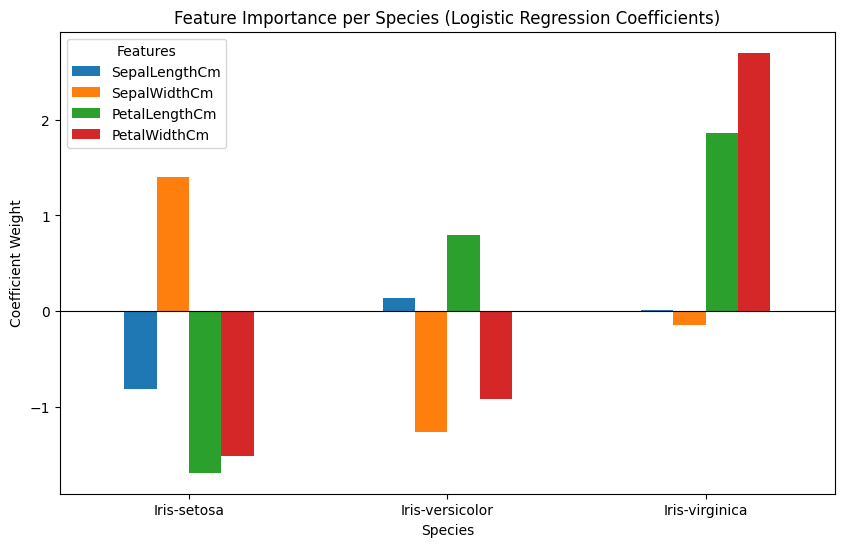

In [ ]:
# Create DataFrame
data = {
    "SepalLengthCm": [-0.810582, 0.136649, 0.012097],
    "SepalWidthCm": [1.399407, -1.258523, -0.142067],
    "PetalLengthCm": [-1.685705, 0.791236, 1.861373],
    "PetalWidthCm": [-1.511997, -0.914543, 2.699254]
}

species = ["Iris-setosa", "Iris-versicolor", "Iris-virginica"]

df_importance = pd.DataFrame(data, index=species)

# Plot grouped barplot
plt.figure(figsize=(10,6))
df_importance.plot(kind="bar", figsize=(10,6))
plt.title("Feature Importance per Species (Logistic Regression Coefficients)")
plt.ylabel("Coefficient Weight")
plt.xlabel("Species")
plt.xticks(rotation=0)
plt.axhline(0, color="black", linewidth=0.8)
plt.legend(title="Features")
plt.show()


## Visualize Decision Boundaries

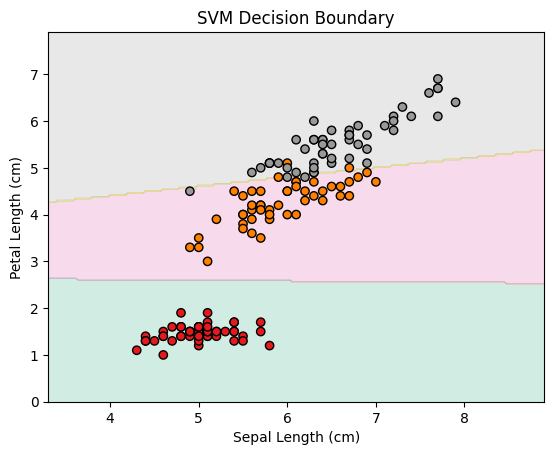

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.svm import SVC

# Use only 2 features for visualization
X_vis = df[["SepalLengthCm", "PetalLengthCm"]].values
y_vis = df["encoded_species"].values

svm_clf = SVC(kernel="linear", C=1, gamma="scale")
svm_clf.fit(X_vis, y_vis)

# Create grid
x_min, x_max = X_vis[:,0].min() - 1, X_vis[:,0].max() + 1
y_min, y_max = X_vis[:,1].min() - 1, X_vis[:,1].max() + 1
xx, yy = np.meshgrid(np.linspace(x_min, x_max, 200),
                     np.linspace(y_min, y_max, 200))

# Predict over grid
Z = svm_clf.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

# Plot decision boundary
plt.contourf(xx, yy, Z, alpha=0.3, cmap="Set2")
plt.scatter(X_vis[:,0], X_vis[:,1], c=y_vis, edgecolors="k", cmap="Set1")
plt.xlabel("Sepal Length (cm)")
plt.ylabel("Petal Length (cm)")
plt.title("SVM Decision Boundary")
plt.show()
